In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


In [38]:
df = pd.read_csv('/sms_spam.csv')
print(df.head())

   type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [39]:
print(f'Número de linhas no dataset: {len(df)}')

Número de linhas no dataset: 5574


In [40]:
# Mapeamento da coluna 'type' para valores numéricos (ham: 0, spam: 1)
df['type'] = df['type'].map({'ham': 0, 'spam': 1})

# Remover linhas com valores nulos, se houver
df.dropna(inplace=True)

In [41]:
# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.2, random_state=1)

# Exibir o número de linhas para treino e teste
print(f'Número de linhas para treino: {len(X_train)}')
print(f'Número de linhas para teste: {len(X_test)}')

Número de linhas para treino: 4180
Número de linhas para teste: 1394


In [42]:
# Vetorização do texto (transformando texto em dados numéricos)
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [43]:
# Testando diferentes valores para o parâmetro alpha
for alpha in [0.5, 1.0, 1.5]:
    modelo = MultinomialNB(alpha=alpha)
    modelo.fit(X_train_vect, y_train)
    previsoes = modelo.predict(X_test_vect)
    print(f'Acurácia com alpha={alpha}: {accuracy_score(y_test, previsoes):.4f}')


Acurácia com alpha=0.5: 0.9892
Acurácia com alpha=1.0: 0.9885
Acurácia com alpha=1.5: 0.9878


In [44]:
# Avaliando o modelo usando validação cruzada
scores = cross_val_score(modelo, X_train_vect, y_train, cv=5, scoring='accuracy')
print(f'Acurácia média com validação cruzada: {scores.mean():.4f}')
print(f'Desvio padrão da acurácia: {scores.std():.4f}')

Acurácia média com validação cruzada: 0.9806
Desvio padrão da acurácia: 0.0042


In [45]:
# Avaliação do modelo
print('Acurácia:', accuracy_score(y_test, previsoes))
print('Relatório de Classificação:\n', classification_report(y_test, previsoes))

Acurácia: 0.9878048780487805
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1212
           1       0.97      0.93      0.95       182

    accuracy                           0.99      1394
   macro avg       0.98      0.96      0.97      1394
weighted avg       0.99      0.99      0.99      1394



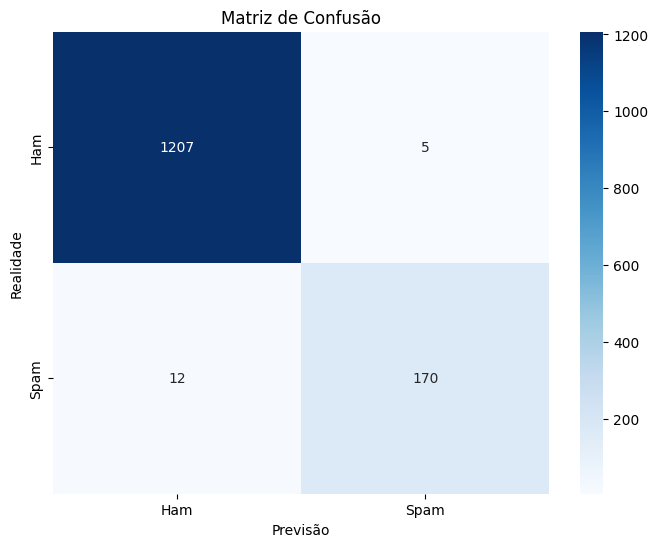

In [46]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, previsoes)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.title('Matriz de Confusão')
plt.show()

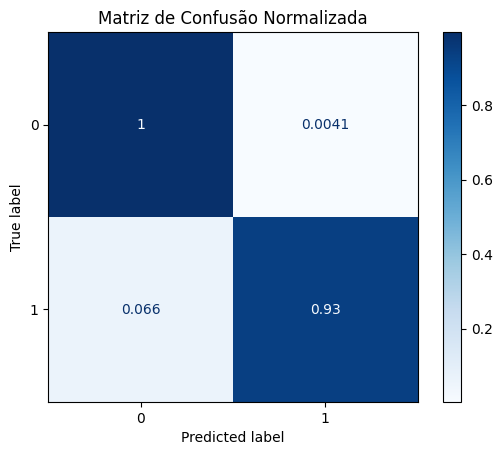

In [47]:
# Exibindo a matriz de confusão normalizada
ConfusionMatrixDisplay.from_estimator(modelo, X_test_vect, y_test, normalize='true', cmap='Blues')
plt.title('Matriz de Confusão Normalizada')
plt.show()

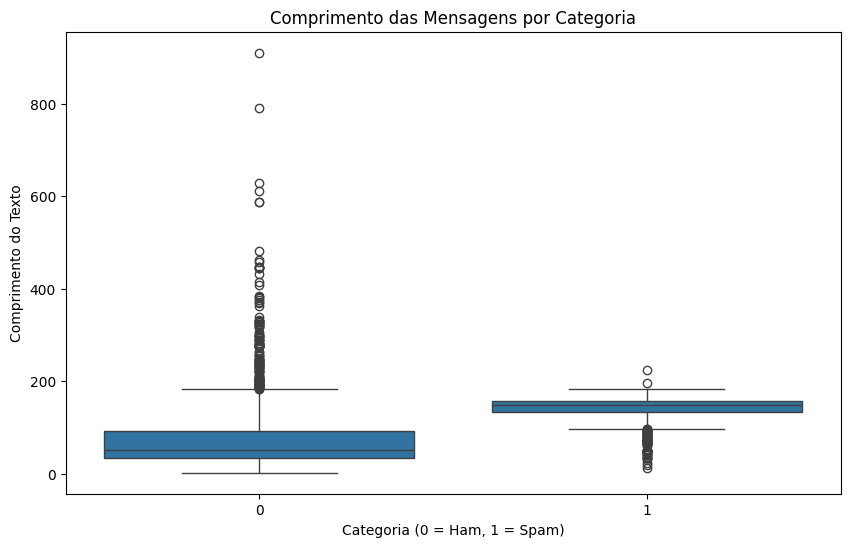

In [25]:
# Análise adicional: Comprimento das mensagens por categoria
df['Comprimento_Texto'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Comprimento_Texto', data=df)
plt.title('Comprimento das Mensagens por Categoria')
plt.xlabel('Categoria (0 = Ham, 1 = Spam)')
plt.ylabel('Comprimento do Texto')
plt.show()